# GEI1002 Project Code Submission

Following cell helps to import necessary Python packages as well as utility files to abstract technical details from prospective users.

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pysentimiento
!{sys.executable} -m pip install googletrans
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install nltk

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from randomised_sampler import RandomisedSampler
from compare_raters import CompareRaters
from comment_parser import CommentParser
from sentiment_toxicity_labeler import SentimentToxicityLabeler
import sentiment_analysis as sa
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Section 1: Sample Generation

For our sample generation, sklearn's <i>shuffle</i> function is used to randomise comments being sampled. <br>
Note that creator name is tagged to the CSV filename, where the CSV file contains the comments being scraped. <br>
The sample size refers to the number of comments sample from each Creator and Platform pair (i.e. welloshow, Youtube) <br>
Lastly ensure that there is a column named 'Comment'.

In [3]:
# do ensure that that your column containing the comments is named 'Comment'
def create_sample(creators, sample_size, input_dir, output_dir, output_filename):
    rs = RandomisedSampler(creators, sample_size, input_dir, output_dir, output_filename)
    rs.random_sample()

In [4]:
CREATOR_NAMES = ["itsclarityco", "thebackstagebunch", "welloshow"]
create_sample(CREATOR_NAMES, 20, "comments", "test", "sample")

You can find your sampled file as ./test/sample.csv


You can run the following cell as a sanity check for whether sampling was done successfully.

In [5]:
df = pd.read_csv("./test/sample.csv")
df.head()

,Unnamed: 0,Creator,Source,Comments
0,44,welloshow,tiktok,can confirm that....
1,47,welloshow,tiktok,that's why i don't want to meet
2,4,itsclarityco,tiktok,deck of?
3,55,welloshow,tiktok,the wife also believe nah bro
4,26,thebackstagebunch,tiktok,fakkah tryna pull an andrew tate


# Section 2: Inter-rater Comparison

To evaluate Pysentimientio's accuracy in detecting sentiments and detecting toxicity, we performed manual evaluation of the model by manually performing sentiment and toxicity analysis. Thereafter, we perform inter-rater comparisons to ensure that the variance between our sentiments is acceptable. We also had to deconflict results where two raters voted 'a' and two raters voted 'b'. Therefore, the class CompareRaters code is modified from textprocessing.py provided in class.

Run the cell below to check if the fields required are correct. You can toggle MODE between "toxicity" and "sentiment".

In [10]:
RATER_NAMES = ["bt", "jl", "jz", "yasmeen"]
MODE = "sentiment"
files = []

for n in RATER_NAMES:
    files.append(f"./manual_coding/{n}_sample_comments.xlsx")
    
CompareRaters.field_check(files, mode=MODE)

True

The following cell combines ratings from all raters involved. <br>
Note that mode here refers to "toxicity" or "sentiment".

In [11]:
combined_df = CompareRaters.combine_ratings(RATER_NAMES, mode=MODE)

The following cell checks if there are any non-agreements, i.e. two raters voted y, and two raters voted n. <br>
If so the program is unable to decide what the actual ground truth is.

In [12]:
combined_df_parsed = CompareRaters.no_agreement_check(combined_df)
combined_df_parsed.head()

Number of no-agreements: 19


,Creator,Source,Comments,bt,jl,jz,yasmeen,ground truth
0,itsclarityco,youtube,It's a moral responsibility of a child to take...,neu,neg,neg,neg,neg
1,itsclarityco,tiktok,"any woman below 30 who is wealthy out there, i...",neu,neu,pos,pos,No agreement!
2,itsclarityco,youtube,"Filial piety, to me, is different at different...",neu,neu,neu,neu,neu
3,thebackstagebunch,tiktok,their parents must be proud,pos,neu,neg,pos,pos
4,thebackstagebunch,tiktok,wait how about see the couple making out but t...,neu,neu,neu,neu,neu


In [13]:
CompareRaters.calculate_fleiss_kappa(combined_df_parsed)

Fliess Kappa is 0.6513046181809485


# Section 3: Manual Evaluation Analysis

For toxicity, we have the following confusion matrix, and the accuracy score given as well. <br>
Accuracy score is calculated as number of mismatch over total number of comments. <br>
Mismatch refers to actual and predicted labels being different.

The accuracy score is 85.0
     n  y
n  152  5
y   22  1


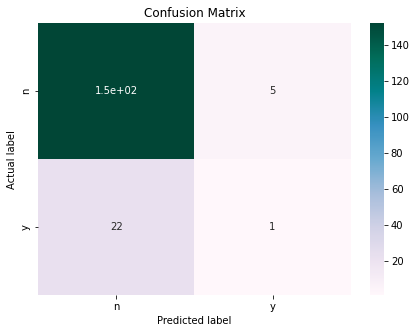

In [14]:
toxicity_analyzer = sa.sentiment_analysis("./manual_coding/toxicity_agreement_confirmed.xlsx", "toxicity")
toxicity_analyzer.confusion_matrix()

You can analyse true positives, true negatives, false positives, false negatives by examining the labels. For example, the following code examines the comments that were predicted as toxic but agreed amongst us human coders as not toxic, i.e. false positives.

In [15]:
toxicity_analyzer.examine_labels(actual="n", predicted="y")

5


,Creator,Source,Comments,bt,jl,jz,yasmeen,ground truth,prediction
13,thebackstagebunch,youtube,THE HAIR ON HER ARM,y,n,n,y,n,y
41,welloshow,tiktok,"""the wife believe"" *does the hand thingy* i cant",n,n,n,n,n,y
76,welloshow,tiktok,the wife believe..,n,n,n,n,n,y
140,itsclarityco,youtube,She is kinda cute ...,n,n,n,n,n,y
178,thebackstagebunch,youtube,Hahaha Dew is cornered by the girls.,n,n,n,n,n,y


The accuracy score is 62.77777777777778
     neg  neu  pos
neg   17   22    1
neu    9   61    1
pos    5   29   35


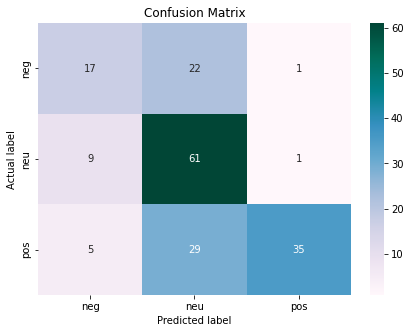

In [16]:
sentiment_analyzer = sa.sentiment_analysis("./manual_coding/agreement_confirmed.xlsx", "sentiment")
sentiment_analyzer.confusion_matrix()

Likewise, you can examine the labels for sentiments here as well.

In [17]:
sentiment_analyzer.examine_labels(actual="pos", predicted="neu")

29


,Creator,Source,Comments,bt,jl,jz,yasmeen,ground truth,prediction
1,itsclarityco,tiktok,"any woman below 30 who is wealthy out there, im up to be a stay at home husband thanks.",neu,neu,pos,pos,pos,neu
30,itsclarityco,youtube,"watching this podcast reminds me of myself when i was a child. I also had an ambitious mom who worked the entire day and people were always saying things (as the host hazelle has done here too) like it's ""needed"" for moms to send the kid to infant care (or in my case, left in the hands of FDWs). My sibling and I grew up to be neglected kids who have issues with intimacy, and I don't want my future kids to go through the same thing. The truth is that it's not necessarily ""needed"" to sacrifice time with the kid! You always have a choice - sometimes it means having to give up a job or interest if you prioritise the child. On a systemic level, I think Sg is also not the most family-friendly place to work in this respect.",neu,neg,pos,pos,pos,neu
34,itsclarityco,tiktok,but the male host is very handsome soo... he is an outlier?,pos,pos,pos,pos,pos,neu
41,welloshow,tiktok,"""the wife believe"" *does the hand thingy* i cant",neu,neu,pos,pos,pos,neu
48,welloshow,youtube,"18:43 ""haikel lemme talk aaaaaa"" HAHAHAHHA",pos,pos,pos,pos,pos,neu
54,itsclarityco,youtube,thank you for sharing your personal experience with us! There's definitely no right or wrong way to parent (and no manual given!). What's most important is for us to find the right balance for your own family.,pos,pos,pos,pos,pos,neu
70,thebackstagebunch,youtube,Keisha what an eye candy,pos,pos,pos,pos,pos,neu
77,thebackstagebunch,tiktok,facts,pos,neu,pos,pos,pos,neu
82,thebackstagebunch,youtube,Munah and Keisha's outfits are BOMBBB,pos,pos,pos,pos,pos,neu
87,welloshow,tiktok,honest answers. yes ghost them,pos,neg,pos,pos,pos,neu


In [18]:
sentiment_analyzer.examine_labels(actual="neg", predicted="neu")

22


,Creator,Source,Comments,bt,jl,jz,yasmeen,ground truth,prediction
13,thebackstagebunch,youtube,THE HAIR ON HER ARM,neg,neu,neg,neg,neg,neu
15,welloshow,youtube,please ADD ENG SUBTITLES TILL THE END OF VID PLEASE\n 28:10,neg,neg,neg,neu,neg,neu
20,welloshow,youtube,Alamak y aslem never stutter or blank anymore siaaaaaa like last timee,neu,neg,neu,neg,neg,neu
21,thebackstagebunch,tiktok,"lol nothing to talk about , so now talk about this lol",neg,neg,neg,neg,neg,neu
37,welloshow,tiktok,the wife believe' babi ah,neg,neg,neg,neu,neg,neu
55,thebackstagebunch,tiktok,why need official? 18 year old no financial or emotional stability official for what?,neu,neg,neg,neg,neg,neu
72,itsclarityco,youtube,Singapore’s high rank structures are based solely on educational levels. Not Combat experience and exposures. \n\nYou’ll be surprised that some of the most decorated and respected soldiers in the US Military are actually corporals and sergeants whom had seen front line actions and life and death situations first hand. Not some officers whom simply has a degree or a so called “scholar”..,neg,neg,neg,neg,neg,neu
74,thebackstagebunch,tiktok,bruh if the tables were turned......,neg,neg,neg,neg,neg,neu
83,thebackstagebunch,tiktok,what did he call that thing? ilbv? man these kids are way young.. soft army,neg,neg,neg,neg,neg,neu
89,thebackstagebunch,youtube,“Minah beetch”,neu,neg,neu,neg,neg,neu


# Section 4: Sentiment and Toxicity Analysis

To perform sentiment analysis and toxicity detection, we first have to clean the comments up. 

We perform a two-step process consisting of translation and comment cleaning for NLP.

The following cell shows how the CommentParser cleans a comment. Irrelevant spaces, tags, newlines, repetitions, punctuations, stopwords are all removed from the comment. We also included a manual filter for users.

In [19]:
comment = "hi I am @ boy"
FILTER_WORDS = ['hi', 'hihi', 'hihihi']
cleaned_comment = CommentParser.clean_comment(comment, FILTER_WORDS)
print(cleaned_comment)  # cleaned comment -> hi boy (filtered @ and h)

hi boy


The following cell shows how the CommentParser translates a comment. To translate the comment, we used an API endpoint provided by Google Translate. This help to both detect and translate to our defaulted language which is English.

In [20]:
comment = "Boleh nampak sah jufri tengah berbual world kat podcast wellow"
comment = CommentParser.translate_comment(comment).text
print(f"Translated comment: {comment}")

Translated comment: It can be seen that jufri is talking about the world on the wellow podcast


The following cell shows how the comment can be analysed by sentiment.

In [21]:
cleaned_comment = CommentParser.clean_comment(comment, FILTER_WORDS)
print(f"Comment after cleaning: {cleaned_comment}")
sentiment = CommentParser.comment_sentiment(cleaned_comment)
print(sentiment)

Comment after cleaning: seen jufri talking world wellow podcast
AnalyzerOutput(output=NEU, probas={NEU: 0.960, POS: 0.036, NEG: 0.004})


The following cell shows how the comment can be analysed for toxicity. "y" is returned if it is toxic and "n" if its not.

In [22]:
comment = "you deserve to die"
translated_comment = CommentParser.translate_comment(comment).text
toxicity = CommentParser.comment_toxicity(translated_comment)
print(toxicity)

y


The following cell shows the full output of the reason why the comment is construed as toxic.

In [23]:
full_toxicity = CommentParser.full_comment_toxicity(translated_comment)
print(full_toxicity)

AnalyzerOutput(output=['hateful', 'targeted'], probas={hateful: 0.629, targeted: 0.717, aggressive: 0.401})


Putting all the elements together, a class called SentimentToxicityLabeler is designed so that all comments can be labelled. <br> It is important that the column be named <i>'Comment'</i> within the input file for the first argument, and the second argument be the file name for the output file.

In [24]:
file_to_code = "./comments/youtube_itsclarityco.csv"
output_file = "./test/youtube_itsclarityco.csv"
stl = SentimentToxicityLabeler(file_to_code, output_file)

You can find your labeled file as: ./test/youtube_itsclarityco.csv


In [25]:
df = pd.read_csv(output_file)
df.head()

,Index,Comment,Sentiment,Toxicity
0,0,"100% agree with Azura. Personally, no kid should feel obliged to ""repay"" their parents if their parents were unable to meet the needs of their children. I think a lot of people misconstrued the concept of parenting as babysitting. To just financially support your child and not meet the emotional needs of the child is not proper parenting, it basically means that you were a great babysitter. So when it comes to obligations, I think it's ultimately a personal choice. I reckon people who lived with abusive and emotionally negligent parents do end up having to heal from their own traumas which they didn't ask for. Ultimately, being a parent should be a thankless job and people should probably put in more thought into it i.e have better planning (being able to afford your own retirement before you even consider having children). Just my two cents (:",neu,n
1,1,"The part where you mentioned “Your parents didn’t leave you when you were young. So you don’t leave them when they’re old” can we reflect back to that statement. What if they MENTALLY left us? Sure they were just there “Physically” but what if they left mentally. As kids, we love it when parents showered us with encouragement and support. So even if they’re just physically in presence but never there mentally, how would you explain that?",neu,n
2,2,"Filial piety, to me, is different at different stages of my life. When I'm still a school-going kid/teen, filial piety is respecting them, honouring them, and being obedient or at least respectfully explaining my views to them if our opinions differ. As I grow up and start working and earning my keep, on top of all those mentioned previously, need to give them monthly allowance while still providing for myself and my family if I'm married. But as they grow older and become more sickly and need closer care and supervision, then filial piety to me is putting them before myself. Sacrificing my own needs to ensure that all their living and healthcare needs are met.",neu,n
3,3,"my relationship w my parents is distant and there are resentment built up growing up. My thought are fixed on not taking much from them since young with the mindset of staying on my own which came to be. I paid for my own education and never demanded for anything. Therefore, I feel like i dont owe them anything. Unhealed trauma does not support filial piety.",neu,n
4,4,Same,neu,n


# Section 5: Data Visualisation

Last but not least, we have come to visualising the data to turn data into information, knowledge or even wisdom under the DIKW framework.

Load the final combined dataset containing all comments with their respective sentiment and toxicity labels.

In [26]:
final_df = pd.read_excel("./comments/final_dataset.xlsx")
final_df.head()

,id,Creator,Platform,Comment,Sentiment,Toxicity
0,1,itsclarityco,tiktok,is he not singaporean?,neu,n
1,2,itsclarityco,tiktok,he who?.. cuz he cute ..,neu,n
2,3,itsclarityco,tiktok,"toxic sia his ""friends""",neu,n
3,4,itsclarityco,tiktok,"some refer singapore as ""switzerland of asia""",neu,n
4,5,itsclarityco,tiktok,his voice sound attractive.,neu,n


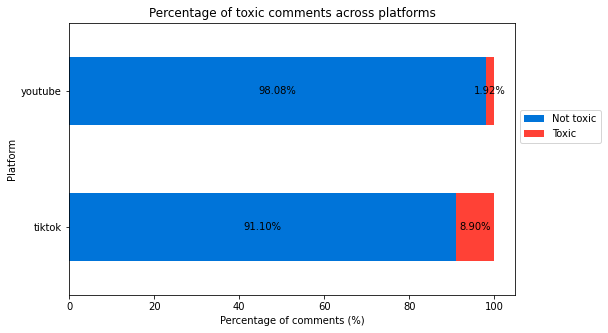

In [27]:
# Percentage of toxic comments on each platform
color = ["#0074D9", "#FF4136"]

    
platform_group = final_df.groupby(['Platform', 'Toxicity']).size().unstack()
ax = platform_group.apply(lambda x:x/x.sum()*100, axis=1).plot(kind='barh', stacked=True, color = color, figsize=(8,5))

for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='center', color='black')


plt.legend(['Not toxic', 'Toxic'], bbox_to_anchor=(1, 0.7))
plt.xlabel('Percentage of comments (%)')
plt.title("Percentage of toxic comments across platforms")

# Uncomment below to save the figure 
plt.savefig("./visualisations/percentage_toxicity_across_platforms.jpg",dpi=300, bbox_inches='tight')

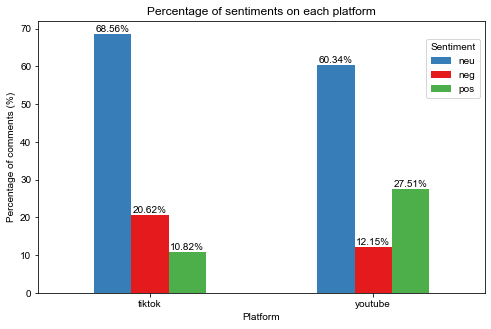

In [28]:
# Percentage of sentiments on each platform

mypalette = ['#377eb8','#e41a1c','#4daf4a']
final_df["Sentiment"] = pd.Categorical(final_df["Sentiment"], ["neu", "neg", "pos"])


platform_group = final_df.groupby(['Platform', 'Sentiment']).size().unstack()
ax = platform_group.apply(lambda x:x/x.sum()*100, axis=1).plot(kind='bar', stacked=False, color = mypalette, figsize=(8,5))
plt.legend(['neu', 'neg', 'pos'], bbox_to_anchor=(1, 0.7), title ="Sentiment", loc=4)
plt.xticks(rotation=0)

for c in ax.containers:

    ax.bar_label(c, fmt='%.2f%%', label_type='edge', color='black')
    

plt.ylabel('Percentage of comments (%)')
plt.title("Percentage of sentiments on each platform")
sns.set_theme()

# Uncomment below to save the figure 
plt.savefig("./visualisations/percentage_sentiments_across_platforms.jpg",dpi=300, bbox_inches='tight')

In [29]:
def compare_sentiment_across_platforms(creator, final_df):
    df = final_df[(final_df["Creator"] == creator)]
    mypalette = ['#377eb8','#e41a1c','#4daf4a']

    x,y = 'Platform', 'Sentiment'

    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette=mypalette)
    g.ax.set_ylim(0,100)
    g.add_legend(title = 'Sentiment')
    g.set_ylabels(label='Proportion of comments')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Sentiment of comments on each platform ({creator})')

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

    plt.savefig(f"./data/{creator}_sentiment.jpg",dpi=500, bbox_inches='tight')
    print(f"You can find your data here: ./data/{creator}_sentiment.jpg")

AttributeError: 'int' object has no attribute 'round'

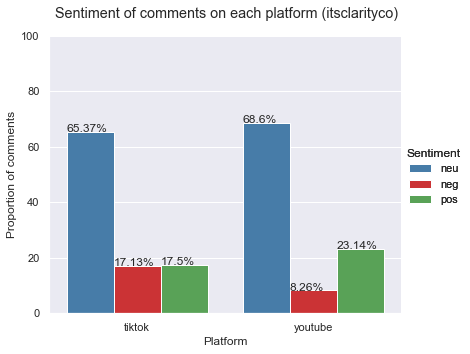

In [30]:
creator = "itsclarityco"
compare_sentiment_across_platforms(creator, final_df)

AttributeError: 'int' object has no attribute 'round'

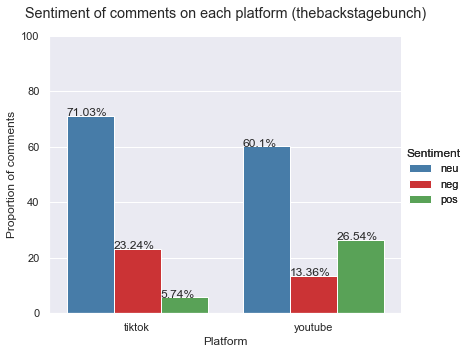

In [32]:
creator = "thebackstagebunch"
compare_sentiment_across_platforms(creator, final_df)

AttributeError: 'int' object has no attribute 'round'

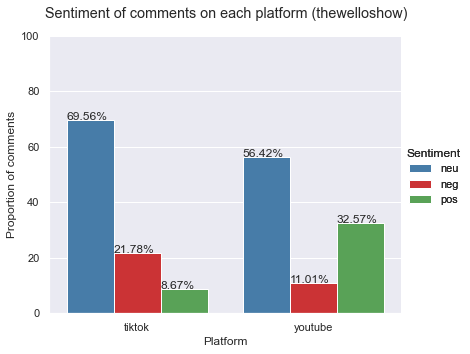

In [31]:
creator = "thewelloshow"
compare_sentiment_across_platforms(creator, final_df)